In [1]:
import tensorflow as tf

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X = iris.data

In [6]:
y = iris.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=100, random_state=1, stratify=y)

In [10]:
model = tf.keras.Sequential() #순서대로 층을 쌓아가겠다.

In [11]:
#은닉충 추가 : 은닉 유닛의 개수, 입력모양, 활성함수
model.add(tf.keras.layers.Dense(16, input_shape = (4,), activation='sigmoid')) # (4,)는 튜플 형식

In [12]:
#출력층 추가 : 출력 유닛의 개수, 활성함수
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
(4 + 1)*16

80

In [15]:
(16 + 1)*3

51

In [16]:
#모델 컴파일 : 비용(loss), 옵티마이저(optimizer:최적화 알고리즘), 지표(metric)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, epochs = 20, batch_size = 2) #random하게 2개 뽑고 고치고를 반복 (batch)

Epoch 1/20
50/50 [==============================] - 1s 1ms/step - loss: 1.1630 - accuracy: 0.2300
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 1.0761 - accuracy: 0.4700
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 1.0332 - accuracy: 0.6500
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.9911 - accuracy: 0.6900
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.9587 - accuracy: 0.7000
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.9276 - accuracy: 0.7000
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.8926 - accuracy: 0.7600
Epoch 8/20
50/50 [==============================] - 0s 1ms/step - loss: 0.8621 - accuracy: 0.7600
Epoch 9/20
50/50 [==============================] - 0s 855us/step - loss: 0.8304 - accuracy: 0.7800
Epoch 10/20
50/50 [==============================] - 0s 871us/step - loss: 0.8017 - accuracy: 0.6900
Epoch 11/20
50/

In [18]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.9600


[0.5943965315818787, 0.9599999785423279]

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
X_train.shape #데이터 6만개, 28*28은 픽셀 수

(60000, 28, 28)

In [21]:
X_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [22]:
import matplotlib.pyplot as plt

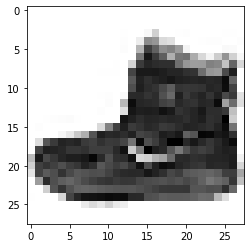

In [23]:
plt.imshow(X_train[0,:,:], cmap='Greys') #im은 이미지

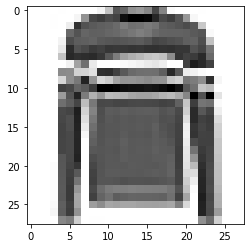

In [24]:
plt.imshow(X_train[5,:,:], cmap='Greys')

In [25]:
y_train[0]

9

In [26]:
y_train[5]

2